In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics


# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix


#### Marks distribution

4 points for Problem 1     2 points for train-test set and classification in (a) + 2 points for metrics in (b)

3 points for Problem 2     2 points for the two classifications + 1 point for comparison and justifications

3 points for Problem 3     2 points for printing samples in the leaf in (a) + 1 point for isolating FPs in (b)

#### Problem 1 : Predicting CentralAir using SalePrice
In this problem, you will build a Classification Tree model to predict CentralAir using SalePrice and judge its accuracy.

a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit two Classification Tree models (of max
depth 2 and max depth 4) on the Train set to predict CentralAir using SalePrice. Print the tree in each case.

b) Print the confusion matrix on Train set and Test set for both the aforesaid models. Compute and print for both
the trees the Classification Accuracy, True Positive Rate, False Positive Rate. Which of the two models is better?

In [2]:
traindt = pd.read_csv('train.csv')

sp = pd.DataFrame(traindt['SalePrice'])
ca = pd.DataFrame(traindt['CentralAir'])

sp_train, sp_test, ca_train, ca_test = train_test_split( sp, ca,  test_size = 0.2)

# Check the sample sizes
print("Train Set :", ca_train.shape, sp_train.shape)
print("Test Set  :", ca_test.shape, sp_test.shape)

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


In [91]:
# Create a Decision Tree Classifier object
dectree2 = DecisionTreeClassifier(max_depth = 2)
dectree4 = DecisionTreeClassifier(max_depth = 4)

[Text(334.8, 543.6, 'SalePrice <= 107700.0\ngini = 0.122\nsamples = 1168\nvalue = [76, 1092]\nclass = CentralAir'),
 Text(167.4, 326.16, 'SalePrice <= 61691.5\ngini = 0.475\nsamples = 126\nvalue = [49, 77]\nclass = CentralAir'),
 Text(83.7, 108.72000000000003, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]\nclass = Not CentralAir'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.452\nsamples = 116\nvalue = [40, 76]\nclass = CentralAir'),
 Text(502.20000000000005, 326.16, 'SalePrice <= 137950.0\ngini = 0.05\nsamples = 1042\nvalue = [27, 1015]\nclass = CentralAir'),
 Text(418.5, 108.72000000000003, 'gini = 0.139\nsamples = 253\nvalue = [19, 234]\nclass = CentralAir'),
 Text(585.9, 108.72000000000003, 'gini = 0.02\nsamples = 789\nvalue = [8, 781]\nclass = CentralAir')]

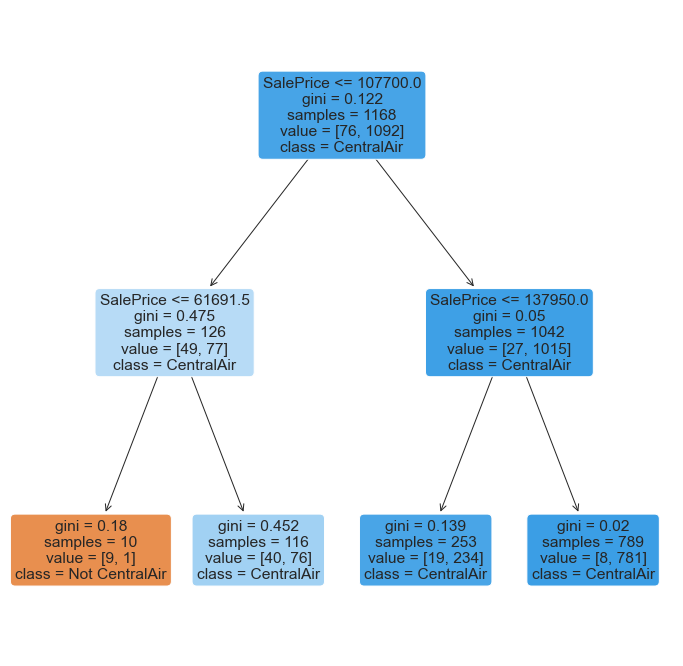

In [92]:
# Train the Decision Tree Classifier model
dectree2.fit(sp_train,ca_train)

f = plt.figure(figsize=(12,12))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["Not CentralAir","CentralAir"])

[Text(481.27500000000003, 587.0880000000001, 'SalePrice <= 107700.0\ngini = 0.122\nsamples = 1168\nvalue = [76, 1092]\nclass = CentralAir'),
 Text(230.175, 456.624, 'SalePrice <= 61691.5\ngini = 0.475\nsamples = 126\nvalue = [49, 77]\nclass = CentralAir'),
 Text(125.55000000000001, 326.1600000000001, 'SalePrice <= 52250.0\ngini = 0.18\nsamples = 10\nvalue = [9, 1]\nclass = Not CentralAir'),
 Text(83.7, 195.69600000000003, 'SalePrice <= 46000.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = Not CentralAir'),
 Text(41.85, 65.23200000000008, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Not CentralAir'),
 Text(125.55000000000001, 65.23200000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = CentralAir'),
 Text(167.4, 195.69600000000003, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = Not CentralAir'),
 Text(334.8, 326.1600000000001, 'SalePrice <= 79250.0\ngini = 0.452\nsamples = 116\nvalue = [40, 76]\nclass = CentralAir'),
 Text(251.10000000000002, 195.69600000000003, 'S

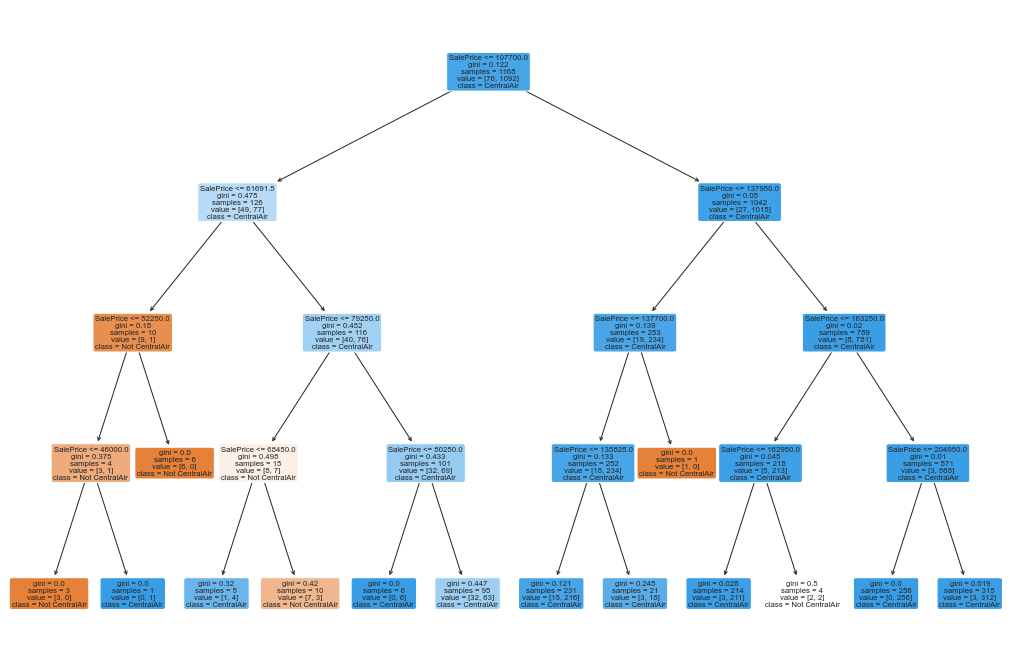

In [93]:
# Train the Decision Tree Classifier model
dectree4.fit(sp_train,ca_train)

f = plt.figure(figsize=(18,12))
plot_tree(dectree4, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["Not CentralAir","CentralAir"])

### Part 1b) deg 2

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9417808219178082

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9452054794520548

Train set
True Positive Rate 	:  0.9990842490842491
False Positive Rate 	:  0.881578947368421
Train set
True Positive Rate 	:  0.9963369963369964
False Positive Rate 	:  0.7894736842105263


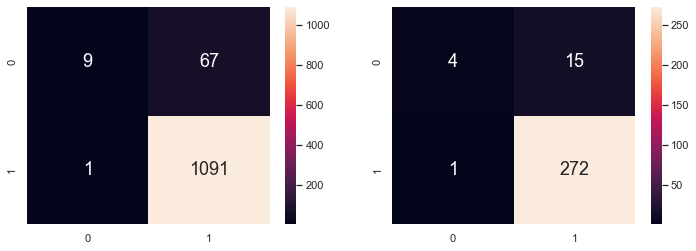

In [94]:
# Predict Legendary values corresponding to Total
ca_train_pred = dectree2.predict(sp_train)
ca_test_pred = dectree2.predict(sp_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree2.score(sp_train, ca_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree2.score(sp_test, ca_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ca_train, ca_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(ca_test, ca_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


cftr = confusion_matrix(ca_train, ca_train_pred)
tp = cftr[1][1] / (cftr[1][1] + cftr[1][0])
fp = cftr[0][1] / (cftr[0][1] + cftr[0][0])
print("Train set")
print("True Positive Rate \t: ", tp)
print("False Positive Rate \t: ", fp)

cftr = confusion_matrix(ca_test, ca_test_pred)
tp = cftr[1][1] / (cftr[1][1] + cftr[1][0])
fp = cftr[0][1] / (cftr[0][1] + cftr[0][0])
print("Train set")
print("True Positive Rate \t: ", tp)
print("False Positive Rate \t: ", fp)

### Part 1b) deg 4

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.946917808219178

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9417808219178082

Train set
True Positive Rate 	:  0.9954212454212454
False Positive Rate 	:  0.75
Train set
True Positive Rate 	:  0.9926739926739927
False Positive Rate 	:  0.7894736842105263


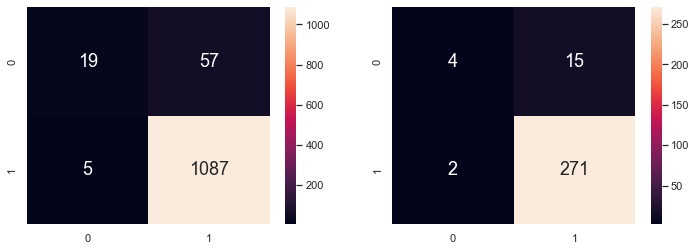

In [95]:
# Predict Legendary values corresponding to Total
ca_train_pred = dectree4.predict(sp_train)
ca_test_pred = dectree4.predict(sp_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree4.score(sp_train, ca_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree4.score(sp_test, ca_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ca_train, ca_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(ca_test, ca_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])



cftr = confusion_matrix(ca_train, ca_train_pred)
tp = cftr[1][1] / (cftr[1][1] + cftr[1][0])
fp = cftr[0][1] / (cftr[0][1] + cftr[0][0])
print("Train set")
print("True Positive Rate \t: ", tp)
print("False Positive Rate \t: ", fp)

cftr = confusion_matrix(ca_test, ca_test_pred)
tp = cftr[1][1] / (cftr[1][1] + cftr[1][0])
fp = cftr[0][1] / (cftr[0][1] + cftr[0][0])
print("Train set")
print("True Positive Rate \t: ", tp)
print("False Positive Rate \t: ", fp)


#### Problem 2 : Predicting CentralAir using Other Variables

Following the steps from the previous problem, build two new uni-variate Classification Tree models (of max depth 4) to
predict CentralAir using the variables OverallQual and YearBuilt. Justify which of the variables is the best predictor

In [96]:
# Extract Response and Predictors
X = pd.DataFrame(traindt[['SalePrice','OverallQual','YearBuilt']])
Y = pd.DataFrame(traindt['CentralAir'])


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (1095, 1) (1095, 3)
Test Set  : (365, 1) (365, 3)


In [97]:
def GF(X,Y):
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
    
    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
    dectree.fit(X_train, y_train)                    # train the decision tree model
    
    f = plt.figure(figsize=(20,12))
    plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Not CentralAir","CentralAir"])

    # Predict Response corresponding to Predictors
    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree.score(X_train, y_train))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree.score(X_test, y_test))
    print()

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    
    
    cftr = confusion_matrix(y_train, y_train_pred)
    tp = cftr[1][1] / (cftr[1][1] + cftr[1][0])
    fp = cftr[0][1] / (cftr[0][1] + cftr[0][0])
    print("Train set")
    print("True Positive Rate \t: ", tp)
    print("False Positive Rate \t: ", fp)
    
    cftr = confusion_matrix(y_test, y_test_pred)
    tp = cftr[1][1] / (cftr[1][1] + cftr[1][0])
    fp = cftr[0][1] / (cftr[0][1] + cftr[0][0])
    print("Train set")
    print("True Positive Rate \t: ", tp)
    print("False Positive Rate \t: ", fp)
    
    
    
    


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9434931506849316

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9486301369863014

Train set
True Positive Rate 	:  0.9880514705882353
False Positive Rate 	:  0.6625
Train set
True Positive Rate 	:  0.9891696750902527
False Positive Rate 	:  0.8


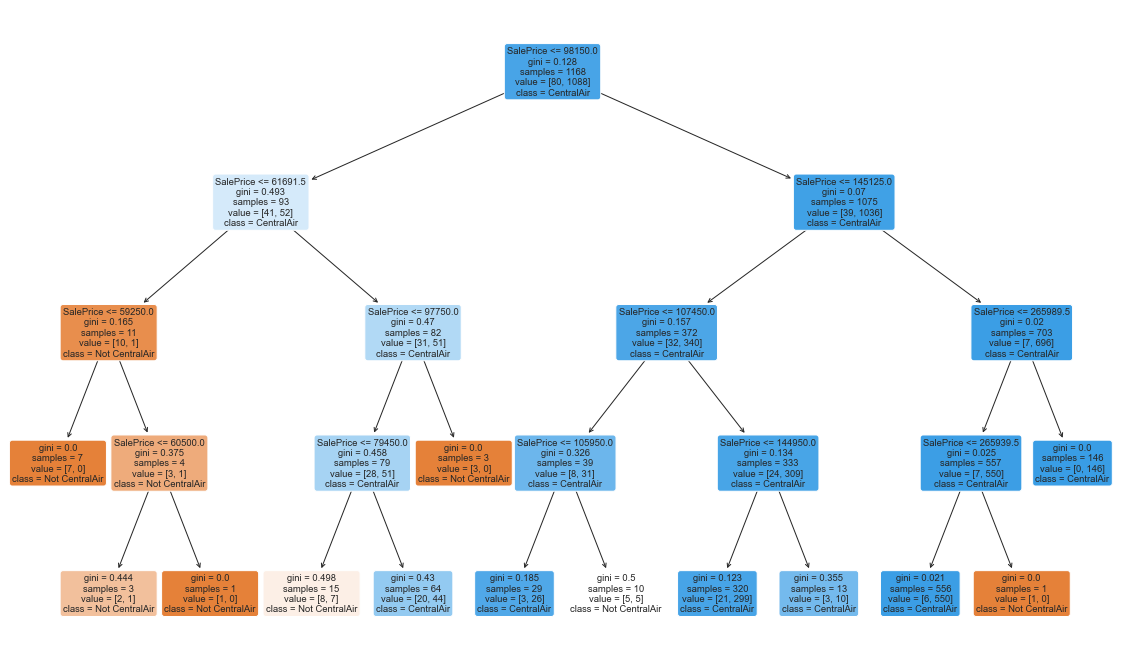

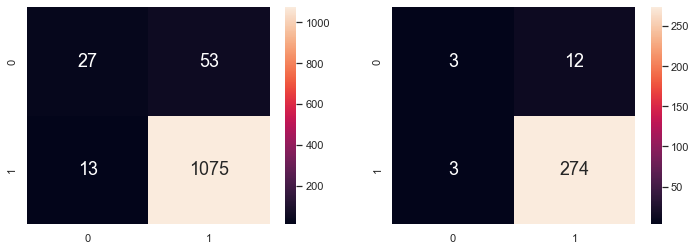

In [98]:
GF(X[['SalePrice']],Y)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9340753424657534

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9623287671232876

Train set
True Positive Rate 	:  0.9935364727608494
False Positive Rate 	:  0.8235294117647058
Train set
True Positive Rate 	:  0.9929078014184397
False Positive Rate 	:  0.9


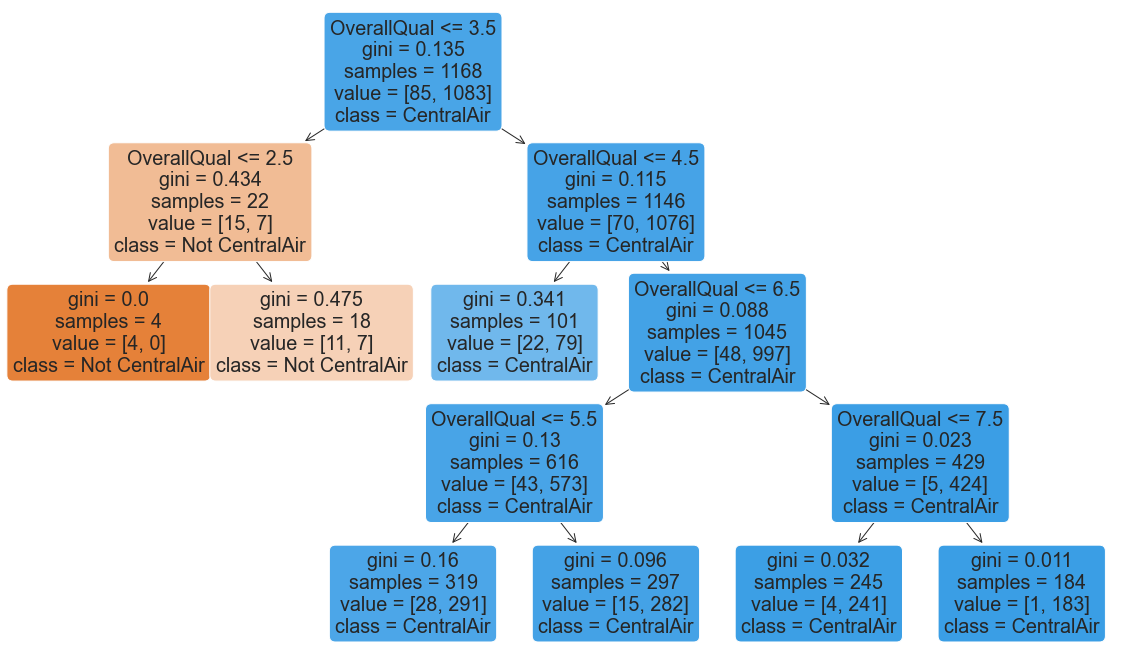

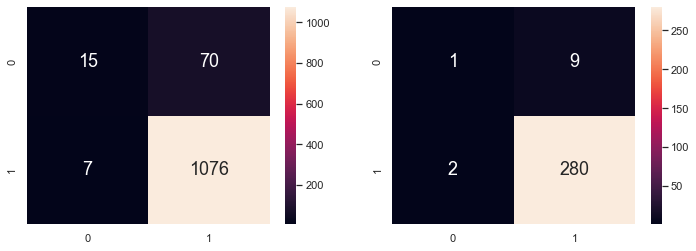

In [99]:
GF(X[['OverallQual']],Y)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9340753424657534

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9212328767123288

Train set
True Positive Rate 	:  0.9733944954128441
False Positive Rate 	:  0.6153846153846154
Train set
True Positive Rate 	:  0.9527272727272728
False Positive Rate 	:  0.5882352941176471


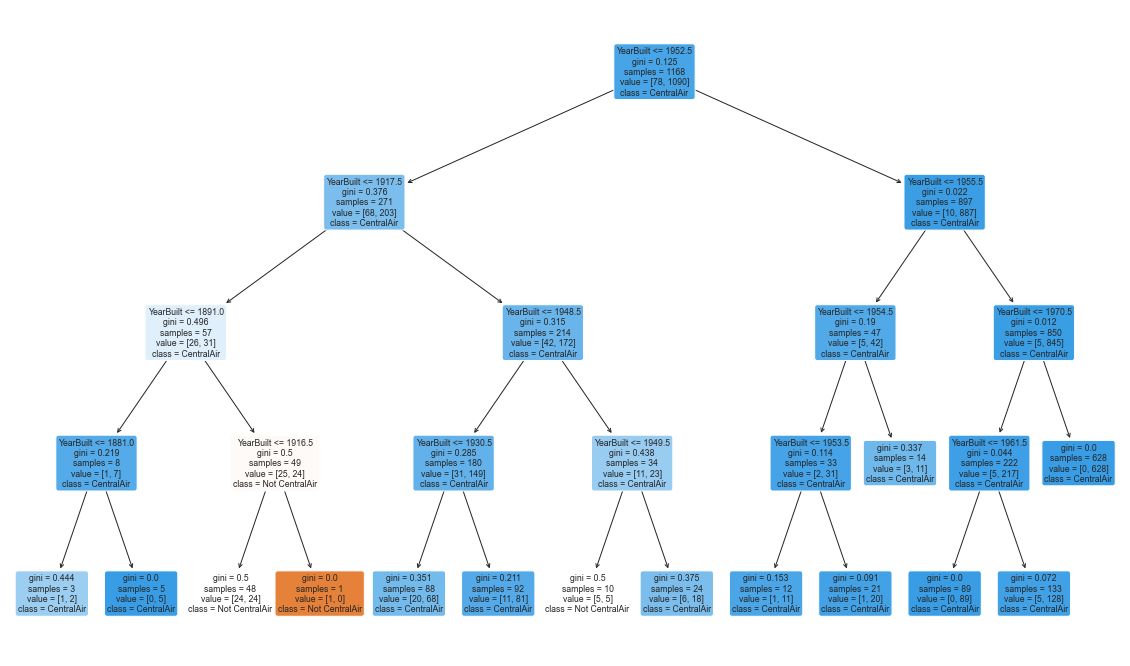

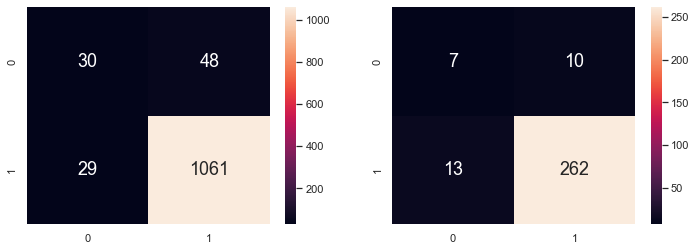

In [100]:
GF(X[['YearBuilt']],Y)

### Answer for Number 2

OverallQual is better as though it has lower TP rate than yearbuilt but the FP rate is lower compare to yearbuilt which mean the possibility of getting the wrong prediction is lower than year built


#### Problem 3 : Understanding the Misclassified Samples
In this problem, you will consider finer details of the tree model and try to isolate the misclassified samples for a model.

(a) Print the Classification Tree of max depth 4 that you fit in Problem 1(a). Note that each leaf node of your tree
represents a specific partition of your training data, based on certain conditions given by the splits in the tree.
Find out which leaf node of this tree has the highest number of False Positives (FP) in the training dataset and
print all samples in the Train set (rows from the dataframe) that end up in this leaf node (partition) during fit.

(b) Print ONLY the False Positive cases (rows from the dataframe) from the samples (rows) extracted in part (a). 

[Text(569.9571428571429, 587.0880000000001, 'SalePrice <= 98150.0\ngini = 0.12\nsamples = 1168\nvalue = [75, 1093]\nclass = CentralAir'),
 Text(292.28571428571433, 456.624, 'SalePrice <= 61691.5\ngini = 0.49\nsamples = 86\nvalue = [37, 49]\nclass = CentralAir'),
 Text(116.91428571428573, 326.1600000000001, 'SalePrice <= 45650.0\ngini = 0.26\nsamples = 13\nvalue = [11, 2]\nclass = Not CentralAir'),
 Text(58.45714285714286, 195.69600000000003, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Not CentralAir'),
 Text(175.3714285714286, 195.69600000000003, 'SalePrice <= 52250.0\ngini = 0.346\nsamples = 9\nvalue = [7, 2]\nclass = Not CentralAir'),
 Text(116.91428571428573, 65.23200000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = CentralAir'),
 Text(233.82857142857145, 65.23200000000008, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = Not CentralAir'),
 Text(467.6571428571429, 326.1600000000001, 'SalePrice <= 97750.0\ngini = 0.459\nsamples = 73\nvalue = [26, 47]\nclass = Cent

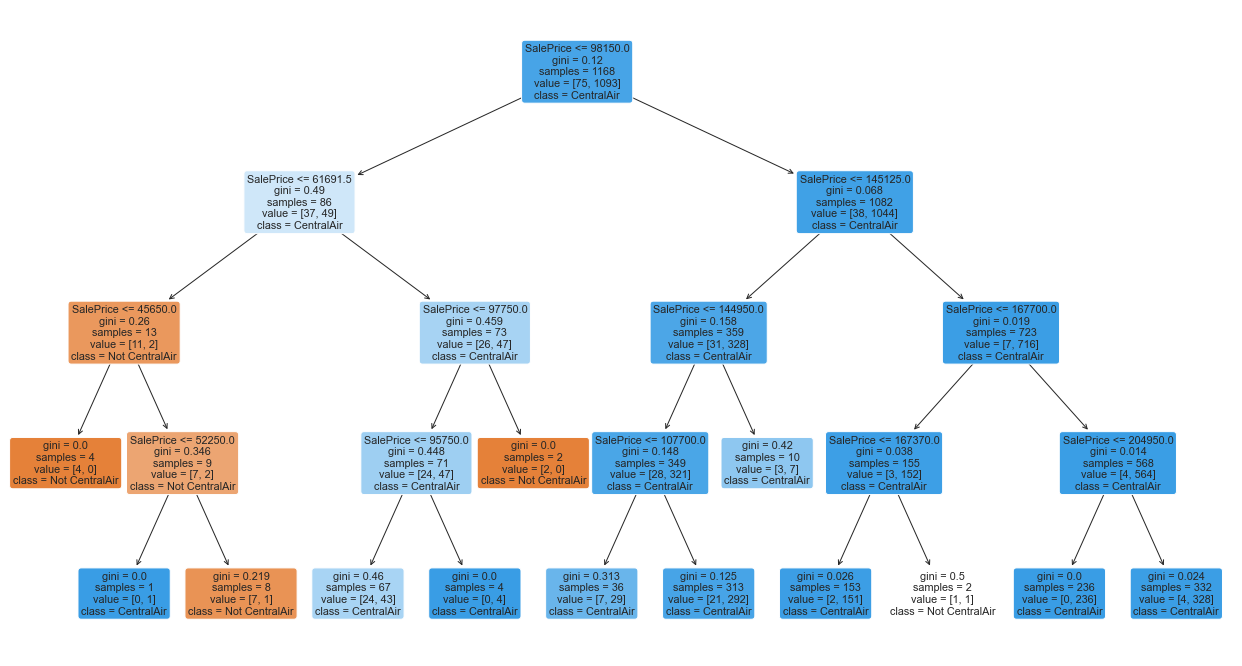

In [132]:
# Train the Decision Tree Classifier model
sp = pd.DataFrame(traindt['SalePrice'])
ca = pd.DataFrame(traindt['CentralAir'])

dt = pd.DataFrame(traindt[['SalePrice','CentralAir']])

sp_train, sp_test, ca_train, ca_test = train_test_split( sp, ca,  test_size = 0.2)

dectree4.fit(sp_train,ca_train)

f = plt.figure(figsize=(22,12))
plot_tree(dectree4, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["Not CentralAir","CentralAir"])

Classification Accuracy 	: 0.9460616438356164


<AxesSubplot:>

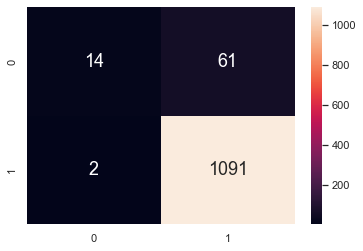

In [133]:
# Predict Legendary corresponding to Total Train
ca_train_pred = dectree4.predict(sp_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree4.score(sp_train, ca_train))


sb.heatmap(confusion_matrix(ca_train, ca_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [134]:
result = pd.concat([sp_train, ca_train], axis=1)
result

,SalePrice,CentralAir
794,194500,Y
279,192000,Y
196,311872,Y
1046,556581,Y
1376,91000,N
...,...,...
252,173000,Y
1220,115000,Y
451,280000,Y
1319,111000,Y


In [137]:
r = result.loc[(result['CentralAir'] == 'N') & (result['SalePrice'] <= 144950) & (result['SalePrice'] >= 107700)]
len(r)

21

In [138]:
r

,SalePrice,CentralAir
108,115000,N
565,128000,N
1349,122000,N
246,137000,N
713,129000,N
596,114504,N
1448,112000,N
291,135900,N
1443,121000,N
870,109500,N
